In [17]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [18]:
df_train = pd.read_csv('train_preprocessed.csv')
df_val = pd.read_csv('val_preprocessed.csv')
df_test = pd.read_csv('test_preprocessed.csv')

In [19]:
df_train

,Unnamed: 0,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,2.011529,1.667256,1
1,1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,0.748357,0.422613,1
2,2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,-0.153910,-0.407149,1
3,3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,-0.875723,-0.822030,0
4,4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,-1.236629,-1.070958,1
...,...,...,...,...,...,...,...,...,...,...
494,495,496,@user1067,2025-02-10 08:50:30,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,1.109263,0.920470,1
495,496,497,@econTalk7,2025-02-10 09:15:55,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,1.289716,1.584280,0
496,497,498,@greenFutureNow7,2025-02-10 10:05:30,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,0.387450,-0.075244,1
497,498,499,@indiePerspective7,2025-02-10 11:35:25,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,-1.669717,-1.361375,0


In [20]:
df_val

,Unnamed: 0,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,0,551,@user1077,2025-02-21 08:30:10,Kamala Harris's new policy on education reform...,Kamala Harris,Democratic Party,0.746167,0.592030,1
1,1,552,@politicsNew3,2025-02-21 09:15:20,Donald Trump's latest speech on the economy wa...,Donald Trump,Republican Party,1.288440,1.666945,1
2,2,553,@greenVisionary3,2025-02-21 10:05:35,Jill Stein's environmental policies are a step...,Jill Stein,Green Party,-0.157621,-0.400199,1
3,3,554,@indieWatcher3,2025-02-21 11:25:40,Robert Kennedy's independent run brings fresh ...,Robert Kennedy,Independent,-1.242166,-1.061685,0
4,4,555,@libertyFan5,2025-02-21 12:40:50,Chase Oliver's stance on gun rights is unwaver...,Chase Oliver,Libertarian Party,-0.519136,-0.730942,1
5,5,556,@user1078,2025-02-22 08:20:15,Kamala Harris is making strides in healthcare ...,Kamala Harris,Democratic Party,0.926925,0.757401,1
6,6,557,@taxTalk6,2025-02-22 09:40:30,Trump's tax cuts are benefiting small businesses.,Donald Trump,Republican Party,1.107683,1.418888,1
7,7,558,@sustainability5,2025-02-22 10:30:50,Jill Stein promotes the adoption of electric v...,Jill Stein,Green Party,0.023137,-0.358856,1
8,8,559,@independantView7,2025-02-22 11:55:20,Robert Kennedy's policies blend diverse ideolo...,Robert Kennedy,Independent,-1.531379,-1.268399,0
9,9,560,@freedomAdvocate8,2025-02-22 12:40:50,Chase Oliver's economic plans focus on maximiz...,Chase Oliver,Libertarian Party,-0.699893,-0.813628,1


In [21]:
df_test

,Unnamed: 0,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,0,501,@user1068,2025-02-11 08:30:10,Kamala Harris's new policy on education reform...,Kamala Harris,Democratic Party,0.746167,0.592030,1
1,1,502,@politicsNew2,2025-02-11 09:15:20,Donald Trump's latest speech on the economy wa...,Donald Trump,Republican Party,1.288440,1.666945,1
2,2,503,@greenVisionary2,2025-02-11 10:05:35,Jill Stein's environmental policies are a step...,Jill Stein,Green Party,-0.157621,-0.400199,1
3,3,504,@indieWatcher2,2025-02-11 11:25:40,Robert Kennedy's independent run brings fresh ...,Robert Kennedy,Independent,-1.242166,-1.061685,0
4,4,505,@libertyFan4,2025-02-11 12:40:50,Chase Oliver's stance on gun rights is unwaver...,Chase Oliver,Libertarian Party,-0.519136,-0.730942,1
5,5,506,@user1069,2025-02-12 08:20:15,Kamala Harris is making strides in healthcare ...,Kamala Harris,Democratic Party,0.926925,0.757401,1
6,6,507,@taxTalk5,2025-02-12 09:40:30,Trump's tax cuts are benefiting small businesses.,Donald Trump,Republican Party,1.107683,1.418888,1
7,7,508,@sustainability4,2025-02-12 10:30:50,Jill Stein promotes the adoption of electric v...,Jill Stein,Green Party,0.023137,-0.358856,1
8,8,509,@independantView7,2025-02-12 11:55:20,Robert Kennedy's policies blend diverse ideolo...,Robert Kennedy,Independent,-1.531379,-1.268399,0
9,9,510,@freedomAdvocate7,2025-02-12 12:40:50,Chase Oliver's economic plans focus on maximiz...,Chase Oliver,Libertarian Party,-0.699893,-0.813628,1


In [22]:
df_train = df_train.drop(columns=['tweet_id', 'Unnamed: 0','user_handle','timestamp','tweet_text','party'])
df_val = df_val.drop(columns=['tweet_id', 'Unnamed: 0','user_handle','timestamp','tweet_text','party'])
df_test = df_test.drop(columns=['tweet_id', 'Unnamed: 0','user_handle','timestamp','tweet_text','party'])

In [23]:
df_train

,candidate,retweets,likes,sentiment
0,Kamala Harris,2.011529,1.667256,1
1,Donald Trump,0.748357,0.422613,1
2,Jill Stein,-0.153910,-0.407149,1
3,Robert Kennedy,-0.875723,-0.822030,0
4,Chase Oliver,-1.236629,-1.070958,1
...,...,...,...,...
494,Kamala Harris,1.109263,0.920470,1
495,Donald Trump,1.289716,1.584280,0
496,Jill Stein,0.387450,-0.075244,1
497,Robert Kennedy,-1.669717,-1.361375,0


In [24]:
df_val

,candidate,retweets,likes,sentiment
0,Kamala Harris,0.746167,0.592030,1
1,Donald Trump,1.288440,1.666945,1
2,Jill Stein,-0.157621,-0.400199,1
3,Robert Kennedy,-1.242166,-1.061685,0
4,Chase Oliver,-0.519136,-0.730942,1
5,Kamala Harris,0.926925,0.757401,1
6,Donald Trump,1.107683,1.418888,1
7,Jill Stein,0.023137,-0.358856,1
8,Robert Kennedy,-1.531379,-1.268399,0
9,Chase Oliver,-0.699893,-0.813628,1


In [25]:
df_test

,candidate,retweets,likes,sentiment
0,Kamala Harris,0.746167,0.592030,1
1,Donald Trump,1.288440,1.666945,1
2,Jill Stein,-0.157621,-0.400199,1
3,Robert Kennedy,-1.242166,-1.061685,0
4,Chase Oliver,-0.519136,-0.730942,1
5,Kamala Harris,0.926925,0.757401,1
6,Donald Trump,1.107683,1.418888,1
7,Jill Stein,0.023137,-0.358856,1
8,Robert Kennedy,-1.531379,-1.268399,0
9,Chase Oliver,-0.699893,-0.813628,1


# KNN Classifier on scaled data without using NLP

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 50)
best_k = 1
maximum = 0

for k in k_values:  # Find best k
    sum_of_accuracies_for_all_candidates = 0
    for candidate in df_train['candidate'].unique():
        # Training data
        cand_train = df_train[df_train['candidate'] == candidate]
        X_train = cand_train[['retweets', 'likes']]
        y_train = cand_train['sentiment'].astype(int)

        # Validation data
        cand_val = df_val[df_val['candidate'] == candidate]
        X_val = cand_val[['retweets', 'likes']]
        y_val = cand_val['sentiment'].astype(int)

        if len(X_val) == 0:
            continue

        # Train and predict on validation
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)

        # Accuracy of validation data
        acc = accuracy_score(y_val, y_pred)
        sum_of_accuracies_for_all_candidates += acc

    if sum_of_accuracies_for_all_candidates > maximum:
        maximum = sum_of_accuracies_for_all_candidates
        best_k = k

print('Best value of k (the one with highest validation accuracy):', best_k)
print('Validation accuracy (model trained with the best value of k) of all the candidates:')

total_correct = 0
total_samples = 0

for candidate in df_train['candidate'].unique():
    # Training data
    cand_train = df_train[df_train['candidate'] == candidate]
    X_train = cand_train[['retweets', 'likes']]
    y_train = cand_train['sentiment'].astype(int)

    # Validation data
    cand_val = df_val[df_val['candidate'] == candidate]
    X_val = cand_val[['retweets', 'likes']]
    y_val = cand_val['sentiment'].astype(int)

    if len(X_val) == 0:
        continue

    # Train and predict on test data
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)

    # Accuracy score
    acc = accuracy_score(y_val, y_pred)
    print(f"{candidate}: {acc:.4f}")

    total_correct += (y_pred == y_val).sum()
    total_samples += len(y_val)


# Weighted average accuracy
weighted_accuracy = total_correct / total_samples
print(f"\nWeighted Average Validation Accuracy: {weighted_accuracy:.4f}")

Best value of k (the one with highest validation accuracy): 1
Validation accuracy (model trained with the best value of k) of all the candidates:
Kamala Harris: 1.0000
Donald Trump: 0.9000
Jill Stein: 1.0000
Robert Kennedy: 1.0000
Chase Oliver: 1.0000

Weighted Average Validation Accuracy: 0.9800


Test accuracy (model trained with the best value of k) of all the candidates:

Kamala Harris  : 1.0000


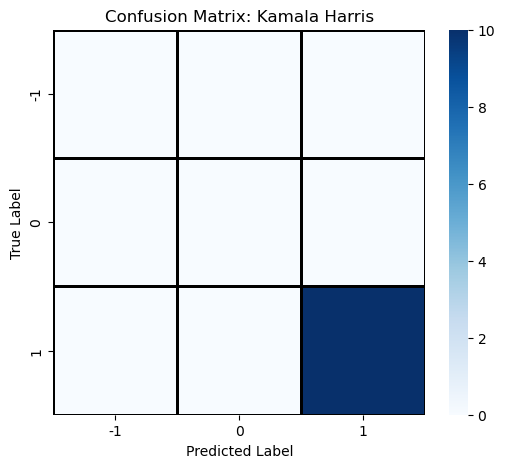

Donald Trump   : 0.9000


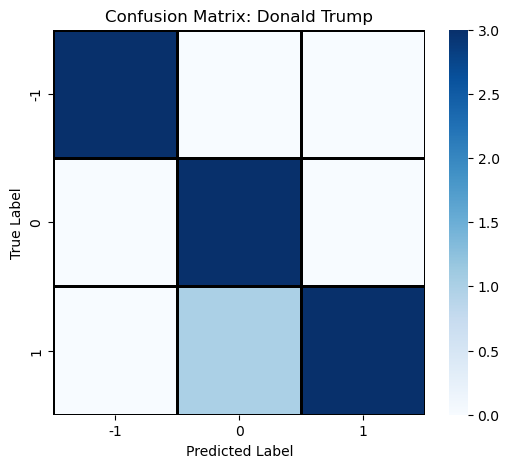

Jill Stein     : 1.0000


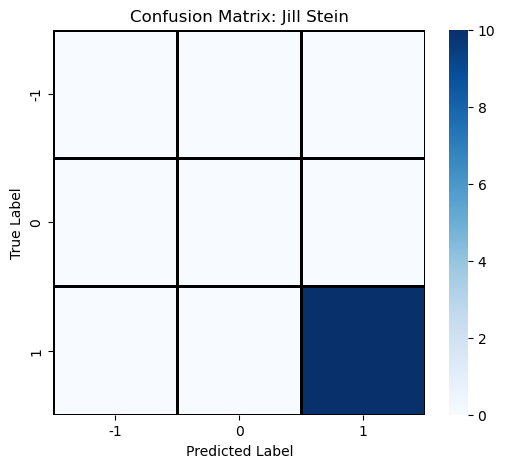

Robert Kennedy : 1.0000


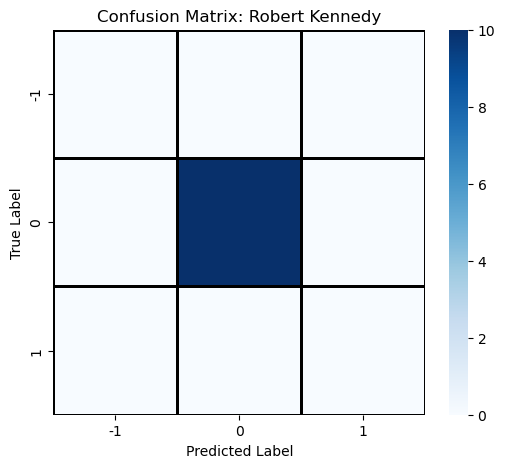

Chase Oliver   : 1.0000


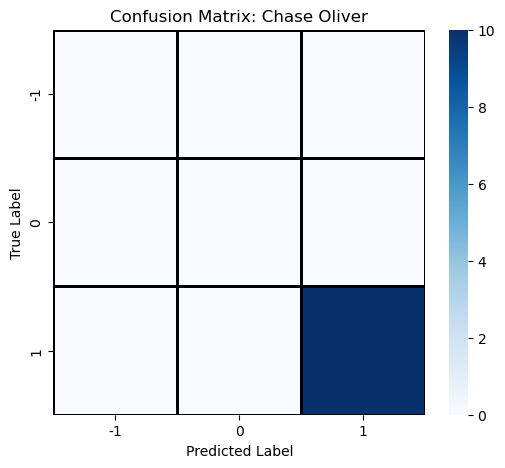


Weighted Average Accuracy: 0.9800

Weighted Precision / Recall / F1:

 Weighted Precision: 0.9814
 Weighted Recall:    0.9800
 Weighted F1 Score:  0.9802


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    precision_recall_fscore_support, 
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Test accuracy (model trained with the best value of k) of all the candidates:\n")

total_correct = 0
total_samples = 0

all_y_true = []
all_y_pred = []

# Define class labels
all_classes = [-1, 0, 1]

for candidate in df_train['candidate'].unique():
    # Training data
    cand_train = df_train[df_train['candidate'] == candidate]
    X_train = cand_train[['retweets', 'likes']]
    y_train = cand_train['sentiment'].astype(int)

    # Test data
    cand_test = df_test[df_test['candidate'] == candidate]
    X_test = cand_test[['retweets', 'likes']]
    y_test = cand_test['sentiment'].astype(int)

    if len(X_test) == 0 or len(X_train) < 1:
        continue

    # Train and predict 
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Accuracy for this candidate
    acc = accuracy_score(y_test, y_pred)
    print(f"{candidate:15s}: {acc:.4f}")

    # Weighted accuracy update
    total_correct += (y_pred == y_test).sum()
    total_samples += len(y_test)

    # Save for overall metrics
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=all_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm,
                annot=False,
                cmap='Blues',
                cbar=True,
                linewidths=1,
                linecolor='black',
                xticklabels=all_classes,
                yticklabels=all_classes)
    plt.title(f"Confusion Matrix: {candidate}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Final weighted average accuracy
weighted_accuracy = total_correct / total_samples
print(f"\nWeighted Average Accuracy: {weighted_accuracy:.4f}")

# Weighted precision, recall, F1
print("\nWeighted Precision / Recall / F1:\n")
weighted_scores = precision_recall_fscore_support(
    all_y_true, all_y_pred, average='weighted', labels=all_classes, zero_division=0
)

print(f" Weighted Precision: {weighted_scores[0]:.4f}")
print(f" Weighted Recall:    {weighted_scores[1]:.4f}")
print(f" Weighted F1 Score:  {weighted_scores[2]:.4f}")

In [28]:
pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


# KNN Classifier on scaled data using NLP

In [29]:
df_train2 = pd.read_csv('train_preprocessed.csv')
df_val2 = pd.read_csv('val_preprocessed.csv')
df_test2 = pd.read_csv('test_preprocessed.csv')

In [30]:
df_train2 = df_train2.drop(columns=['tweet_id', 'Unnamed: 0','user_handle','timestamp','party'])
df_val2 = df_val2.drop(columns=['tweet_id', 'Unnamed: 0','user_handle','timestamp','party'])
df_test2 = df_test2.drop(columns=['tweet_id', 'Unnamed: 0','user_handle','timestamp','party'])

In [31]:
df_train2

,tweet_text,candidate,retweets,likes,sentiment
0,Excited to see Kamala Harris leading the Democ...,Kamala Harris,2.011529,1.667256,1
1,Donald Trump's policies are the best for our e...,Donald Trump,0.748357,0.422613,1
2,Jill Stein's environmental plans are exactly w...,Jill Stein,-0.153910,-0.407149,1
3,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,-0.875723,-0.822030,0
4,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,-1.236629,-1.070958,1
...,...,...,...,...,...
494,Kamala Harris is a symbol of progressive leade...,Kamala Harris,1.109263,0.920470,1
495,Trump's economic strategies are showing mixed ...,Donald Trump,1.289716,1.584280,0
496,Jill Stein's solar projects are leading the wa...,Jill Stein,0.387450,-0.075244,1
497,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,-1.669717,-1.361375,0


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
from sentence_transformers import SentenceTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Load BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Get tweet vectors using BERT 
def get_tweet_vectors(tweets):
    return model.encode(tweets.tolist(), show_progress_bar=True)

# Main function
def knn_weighted_accuracy(train, test, val, k_range=range(1, 51)):
    total_test = 0
    weighted_test_sum = 0

    all_y_true = []
    all_y_pred = []

    best_k_dict = {}

    print("\n Per-candidate Weighted Test Accuracies:\n")

    for candidate in train['candidate'].unique():
        # Filter data
        train_c = train[train['candidate'] == candidate]
        test_c = test[test['candidate'] == candidate]
        val_c = val[val['candidate'] == candidate]

        if len(train_c) < 10 or len(val_c) == 0 or len(test_c) == 0:
            continue

        # BERT embeddings
        X_train_text = get_tweet_vectors(train_c['tweet_text'])
        X_test_text = get_tweet_vectors(test_c['tweet_text'])
        X_val_text = get_tweet_vectors(val_c['tweet_text'])

        # Numerical features
        X_train_num = train_c[['likes', 'retweets']].values
        X_test_num = test_c[['likes', 'retweets']].values
        X_val_num = val_c[['likes', 'retweets']].values

        # Combine
        X_train = np.hstack((X_train_text, X_train_num))
        X_test = np.hstack((X_test_text, X_test_num))
        X_val = np.hstack((X_val_text, X_val_num))

        y_train = train_c['sentiment'].values
        y_test = test_c['sentiment'].values
        y_val = val_c['sentiment'].values

        # Find best k on validation data
        best_k = 1
        best_val_acc = 0

        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
            knn.fit(X_train, y_train)
            val_pred = knn.predict(X_val)
            acc_val = accuracy_score(y_val, val_pred)
            if acc_val > best_val_acc:
                best_val_acc = acc_val
                best_k = k

        best_k_dict[candidate] = best_k

        # Train/test with best k
        knn_final = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')
        knn_final.fit(X_train, y_train)
        test_pred = knn_final.predict(X_test)
        acc_test = accuracy_score(y_test, test_pred)

        # Update weighted sum
        weight = len(y_test)
        weighted_test_sum += acc_test * weight
        total_test += weight

        # Save for weighted metrics
        all_y_true.extend(y_test)
        all_y_pred.extend(test_pred)

        # Confusion matrix
        all_classes = [-1, 0, 1]
        cm = confusion_matrix(y_test, test_pred, labels=all_classes)

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, 
                    annot=False, 
                    cmap='Blues', 
                    cbar=True, 
                    linewidths=1, 
                    linecolor='black',
                    xticklabels=all_classes,
                    yticklabels=all_classes)
        plt.title(f"Confusion Matrix: {candidate}")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

        print(f" {candidate:15s} | Test Accuracy: {acc_test:.4f} | Best k: {best_k:2d} | Weight: {weight}")

    # Final weighted accuracy
    weighted_accuracy = weighted_test_sum / total_test if total_test > 0 else 0
    print(f"\n Final Weighted Test Accuracy: {weighted_accuracy:.4f}")

    # Weighted precision/recall/F1
    print("\nWeighted Precision / Recall / F1 (all candidates combined):\n")

    weighted_scores = precision_recall_fscore_support(
        all_y_true, all_y_pred, average='weighted', labels=[-1, 0, 1], zero_division=0
    )

    print(f" Weighted Precision: {weighted_scores[0]:.4f}")
    print(f" Weighted Recall:    {weighted_scores[1]:.4f}")
    print(f" Weighted F1 Score:  {weighted_scores[2]:.4f}\n")



 Per-candidate Weighted Test Accuracies:



Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

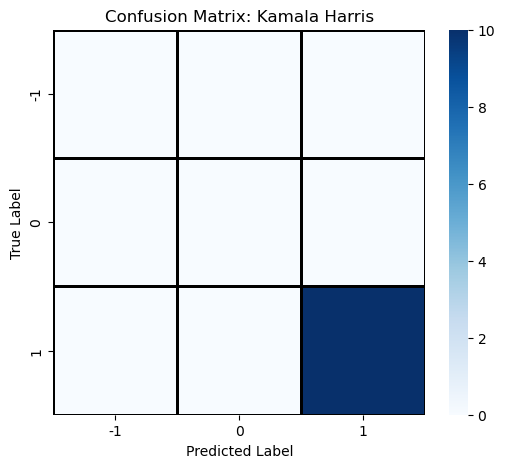

 Kamala Harris   | Test Accuracy: 1.0000 | Best k:  1 | Weight: 10


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

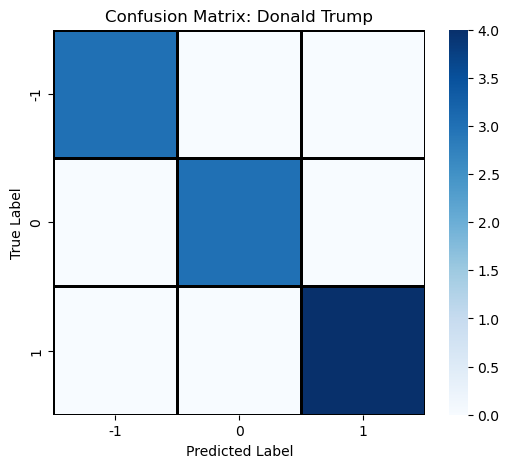

 Donald Trump    | Test Accuracy: 1.0000 | Best k:  1 | Weight: 10


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

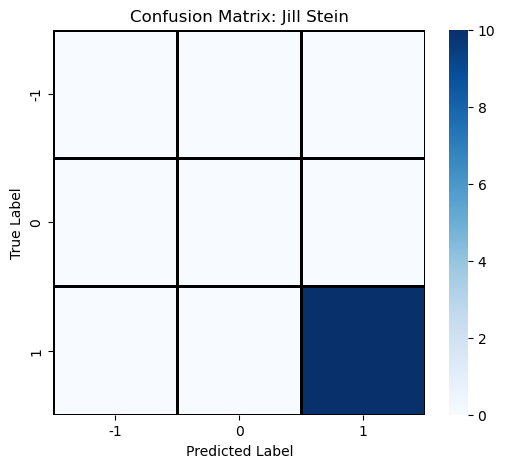

 Jill Stein      | Test Accuracy: 1.0000 | Best k:  1 | Weight: 10


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

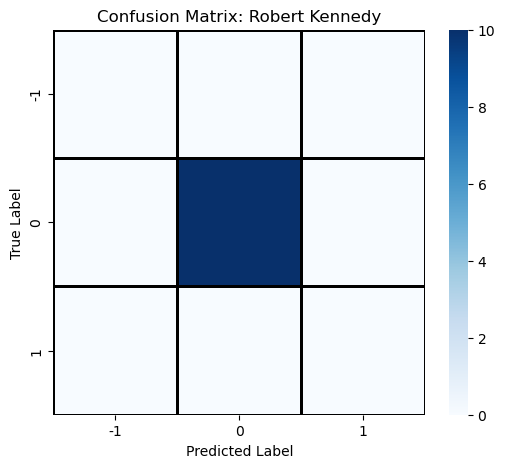

 Robert Kennedy  | Test Accuracy: 1.0000 | Best k:  1 | Weight: 10


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

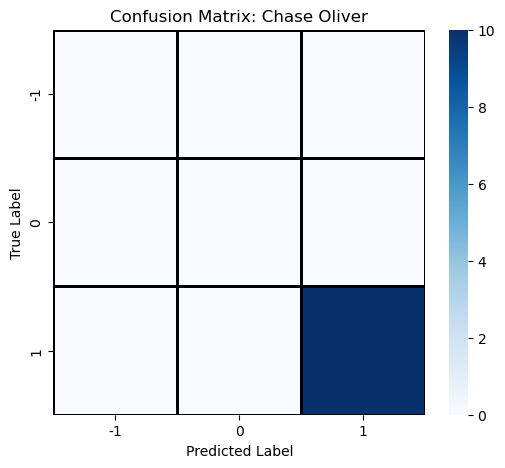

 Chase Oliver    | Test Accuracy: 1.0000 | Best k:  1 | Weight: 10

 Final Weighted Test Accuracy: 1.0000

Weighted Precision / Recall / F1 (all candidates combined):

 Weighted Precision: 1.0000
 Weighted Recall:    1.0000
 Weighted F1 Score:  1.0000



In [33]:
results = knn_weighted_accuracy(df_train2, df_test2, df_val2)

# KNN Classifier on unscaled data without using NLP

In [34]:
df_train_unscaled = pd.read_csv('train.csv')
df_val_unscaled = pd.read_csv('val.csv')
df_test_unscaled = pd.read_csv('test.csv')

In [35]:
df_train_unscaled = df_train_unscaled.drop(columns=['tweet_id','user_handle','timestamp','tweet_text','party'])
df_val_unscaled = df_val_unscaled.drop(columns=['tweet_id','user_handle','timestamp','tweet_text','party'])
df_test_unscaled = df_test_unscaled.drop(columns=['tweet_id','user_handle','timestamp','tweet_text','party'])

In [36]:
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df_train_unscaled['sentiment'] = df_train_unscaled['sentiment'].map(sentiment_mapping)
df_train_unscaled.dropna(subset=['sentiment'], inplace=True)
df_train_unscaled['sentiment'] = df_train_unscaled['sentiment'].astype(int)
df_val_unscaled['sentiment'] = df_val_unscaled['sentiment'].map(sentiment_mapping)
df_test_unscaled['sentiment'] = df_test_unscaled['sentiment'].map(sentiment_mapping)

Best value of k (the one with highest validation accuracy): 1
Validation accuracy (model trained with the best value of k) of all the candidates:
Kamala Harris: 1.0000


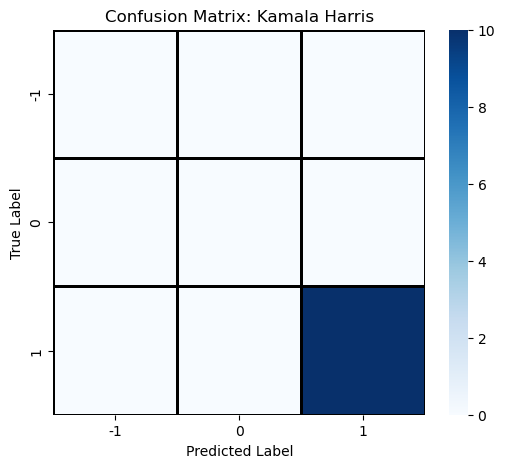

Donald Trump: 0.9000


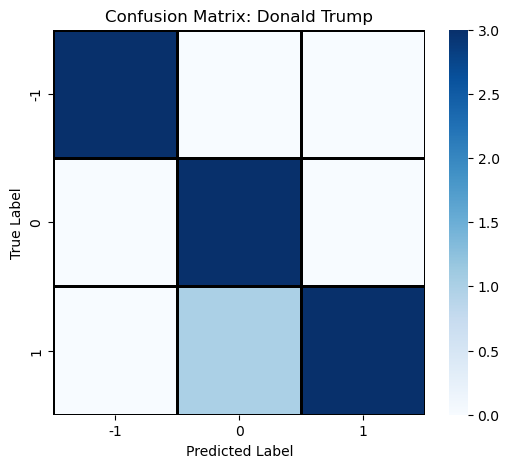

Jill Stein: 1.0000


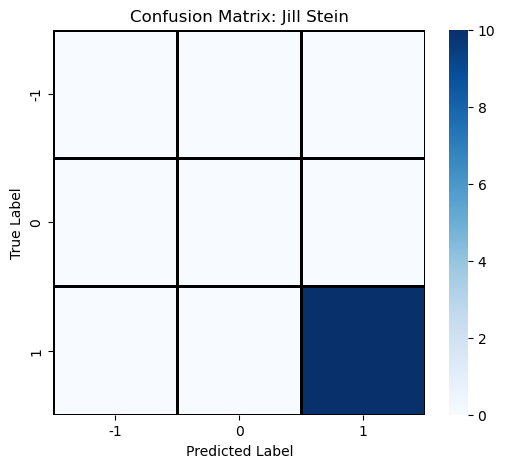

Robert Kennedy: 1.0000


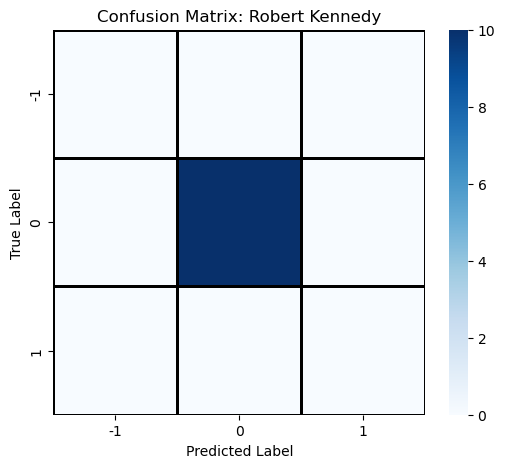

Chase Oliver: 1.0000


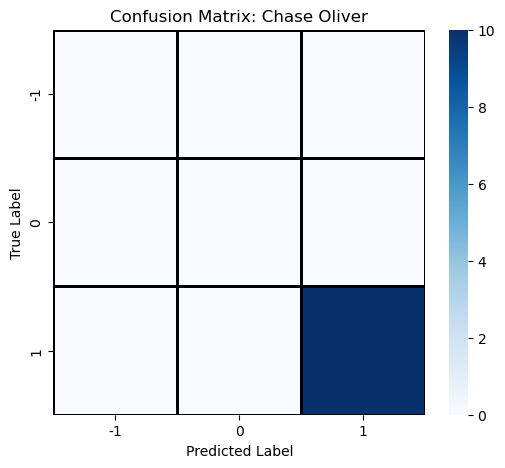


Weighted Average Validation Accuracy: 0.9800


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 50)
best_k = 1
maximum = 0

# Find best k
for k in k_values:
    sum_of_accuracies_for_all_candidates = 0
    for candidate in df_train_unscaled['candidate'].unique():
        # Training data
        cand_train = df_train_unscaled[df_train_unscaled['candidate'] == candidate]
        X_train = cand_train[['retweets', 'likes']]
        y_train = cand_train['sentiment'].astype(int)

        # Validation data
        cand_val = df_val_unscaled[df_val_unscaled['candidate'] == candidate]
        X_val = cand_val[['retweets', 'likes']]
        y_val = cand_val['sentiment'].astype(int)

        if len(X_val) == 0:
            continue

        # Train and predict
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)

        # Accuracy
        acc = accuracy_score(y_val, y_pred)
        sum_of_accuracies_for_all_candidates += acc

    if sum_of_accuracies_for_all_candidates > maximum:
        maximum = sum_of_accuracies_for_all_candidates
        best_k = k

print('Best value of k (the one with highest validation accuracy):', best_k)
print('Validation accuracy (model trained with the best value of k) of all the candidates:')

total_correct = 0
total_samples = 0

for candidate in df_train_unscaled['candidate'].unique():
    # Training data
    cand_train = df_train_unscaled[df_train_unscaled['candidate'] == candidate]
    X_train = cand_train[['retweets', 'likes']]
    y_train = cand_train['sentiment'].astype(int)

    # Validation data
    cand_val = df_val_unscaled[df_val_unscaled['candidate'] == candidate]
    X_val = cand_val[['retweets', 'likes']]
    y_val = cand_val['sentiment'].astype(int)

    if len(X_val) == 0:
        continue

    # Train and predict
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)

    # Accuracy
    acc = accuracy_score(y_val, y_pred)
    print(f"{candidate}: {acc:.4f}")

    total_correct += (y_pred == y_val).sum()
    total_samples += len(y_val)
    
    # Replace with all possible class labels
    all_classes = [-1, 0, 1]
    cm = confusion_matrix(y_val, y_pred, labels=all_classes)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, 
                annot=False, 
                cmap='Blues', 
                cbar=True, 
                linewidths=1, 
                linecolor='black',
                xticklabels=all_classes,
                yticklabels=all_classes)
    plt.title(f"Confusion Matrix: {candidate}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Weighted average accuracy
weighted_accuracy = total_correct / total_samples
print(f"\nWeighted Average Validation Accuracy: {weighted_accuracy:.4f}")

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Validation accuracy (model trained with the best value of k) of all the candidates:")

total_correct = 0
total_samples = 0

total_weight = 0
total_precision = 0
total_recall = 0
total_f1 = 0

for candidate in df_train_unscaled['candidate'].unique():
    # Training data
    cand_train = df_train_unscaled[df_train_unscaled['candidate'] == candidate]
    X_train = cand_train[['retweets', 'likes']]
    y_train = cand_train['sentiment'].astype(int)

    # Test data
    cand_test = df_test_unscaled[df_test_unscaled['candidate'] == candidate]
    X_test = cand_test[['retweets', 'likes']]
    y_test = cand_test['sentiment'].astype(int)

    if len(X_test) == 0:
        continue

    # Train and predict
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Accuracy for this candidate
    acc = accuracy_score(y_test, y_pred)
    print(f"{candidate}: {acc:.4f}")

    # Weighted accuracy
    total_correct += (y_pred == y_test).sum()
    total_samples += len(y_test)
    weight = len(y_test)
    total_weight += weight

    # Weighted precision, recall, F1
    total_precision += precision_score(y_test, y_pred, average='weighted', zero_division=0) * weight
    total_recall += recall_score(y_test, y_pred, average='weighted', zero_division=0) * weight
    total_f1 += f1_score(y_test, y_pred, average='weighted', zero_division=0) * weight

# Final weighted metrics
weighted_accuracy = total_correct / total_samples
weighted_precision = total_precision / total_weight
weighted_recall = total_recall / total_weight
weighted_f1 = total_f1 / total_weight

print(f"\n📊 Final Weighted Metrics:")
print(f"Weighted Accuracy : {weighted_accuracy:.4f}")
print(f"Weighted Precision: {weighted_precision:.4f}")
print(f"Weighted Recall   : {weighted_recall:.4f}")
print(f"Weighted F1-score : {weighted_f1:.4f}")

Validation accuracy (model trained with the best value of k) of all the candidates:
Kamala Harris: 1.0000
Donald Trump: 0.9000
Jill Stein: 1.0000
Robert Kennedy: 1.0000
Chase Oliver: 1.0000

📊 Final Weighted Metrics:
Weighted Accuracy : 0.9800
Weighted Precision: 0.9850
Weighted Recall   : 0.9800
Weighted F1-score : 0.9800


# KNN Classifier on unscaled data using NLP

In [39]:
df_train_unscaled2 = pd.read_csv('train.csv')
df_val_unscaled2 = pd.read_csv('val.csv')
df_test_unscaled2 = pd.read_csv('test.csv')

In [40]:
df_train_unscaled2 = df_train_unscaled2.drop(columns=['tweet_id','user_handle','timestamp','party'])
df_val_unscaled2 = df_val_unscaled2.drop(columns=['tweet_id','user_handle','timestamp','party'])
df_test_unscaled2 = df_test_unscaled2.drop(columns=['tweet_id','user_handle','timestamp','party'])

In [41]:
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df_train_unscaled2['sentiment'] = df_train_unscaled2['sentiment'].map(sentiment_mapping)
df_train_unscaled2.dropna(subset=['sentiment'], inplace=True)
df_train_unscaled2['sentiment'] = df_train_unscaled2['sentiment'].astype(int)
df_val_unscaled2['sentiment'] = df_val_unscaled2['sentiment'].map(sentiment_mapping)
df_test_unscaled2['sentiment'] = df_test_unscaled2['sentiment'].map(sentiment_mapping)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
from sentence_transformers import SentenceTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Load BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Get tweet vectors using BERT
def get_tweet_vectors(tweets):
    return model.encode(tweets.tolist(), show_progress_bar=True)

# Main function: tune K per candidate
def knn_weighted_accuracy(train, test, val, k_range=range(1, 51)):
    total_test = 0
    weighted_test_sum = 0
    weighted_precision_sum = 0
    weighted_recall_sum = 0
    weighted_f1_sum = 0

    print("\n📊 Per-candidate Weighted Test Accuracies:\n")

    for candidate in train['candidate'].unique():
        # Filter data
        train_c = train[train['candidate'] == candidate]
        test_c = test[test['candidate'] == candidate]
        val_c = val[val['candidate'] == candidate]

        if len(train_c) < 10 or len(val_c) == 0 or len(test_c) == 0:
            continue

        # BERT embeddings
        X_train_text = get_tweet_vectors(train_c['tweet_text'])
        X_test_text = get_tweet_vectors(test_c['tweet_text'])
        X_val_text = get_tweet_vectors(val_c['tweet_text'])

        # Numerical features
        X_train_num = train_c[['likes', 'retweets']].values
        X_test_num = test_c[['likes', 'retweets']].values
        X_val_num = val_c[['likes', 'retweets']].values

        # Combine
        X_train = np.hstack((X_train_text, X_train_num))
        X_test = np.hstack((X_test_text, X_test_num))
        X_val = np.hstack((X_val_text, X_val_num))

        y_train = train_c['sentiment'].values
        y_test = test_c['sentiment'].values
        y_val = val_c['sentiment'].values

        # Find best k on validation data
        best_k = 1
        best_val_acc = 0

        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
            knn.fit(X_train, y_train)
            val_pred = knn.predict(X_val)
            acc_val = accuracy_score(y_val, val_pred)
            if acc_val > best_val_acc:
                best_val_acc = acc_val
                best_k = k

        # Train/test with best k
        knn_final = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')
        knn_final.fit(X_train, y_train)
        test_pred = knn_final.predict(X_test)
        acc_test = accuracy_score(y_test, test_pred)

        # Per-candidate weight
        weight = len(y_test)
        total_test += weight
        weighted_test_sum += acc_test * weight

        # Compute weighted metrics for this candidate
        weighted_precision_sum += precision_score(y_test, test_pred, average='weighted', zero_division=0) * weight
        weighted_recall_sum += recall_score(y_test, test_pred, average='weighted', zero_division=0) * weight
        weighted_f1_sum += f1_score(y_test, test_pred, average='weighted', zero_division=0) * weight

        # Confusion Matrix
        all_classes = [-1, 0, 1]
        cm = confusion_matrix(y_test, test_pred, labels=all_classes)

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, 
                    annot=False, 
                    cmap='Blues', 
                    cbar=True,
                    linewidths=1, 
                    linecolor='black',
                    xticklabels=all_classes,
                    yticklabels=all_classes)
        plt.title(f"Confusion Matrix: {candidate}")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

        # Output this candidate’s test performance
        print(f"{candidate:15s} | Test Accuracy: {acc_test:.4f} | Weight: {weight}")

    # Final aggregated weighted metrics
    weighted_accuracy = weighted_test_sum / total_test if total_test > 0 else 0
    weighted_precision = weighted_precision_sum / total_test if total_test > 0 else 0
    weighted_recall = weighted_recall_sum / total_test if total_test > 0 else 0
    weighted_f1 = weighted_f1_sum / total_test if total_test > 0 else 0

    print(f"\n📈 Final Weighted Test Metrics:")
    print(f"Weighted Accuracy : {weighted_accuracy:.4f}")
    print(f"Weighted Precision: {weighted_precision:.4f}")
    print(f"Weighted Recall   : {weighted_recall:.4f}")
    print(f"Weighted F1-score : {weighted_f1:.4f}")


📊 Per-candidate Weighted Test Accuracies:



Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

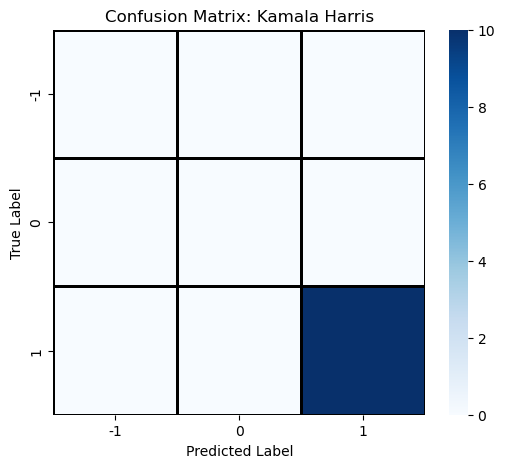

Kamala Harris   | Test Accuracy: 1.0000 | Weight: 10


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

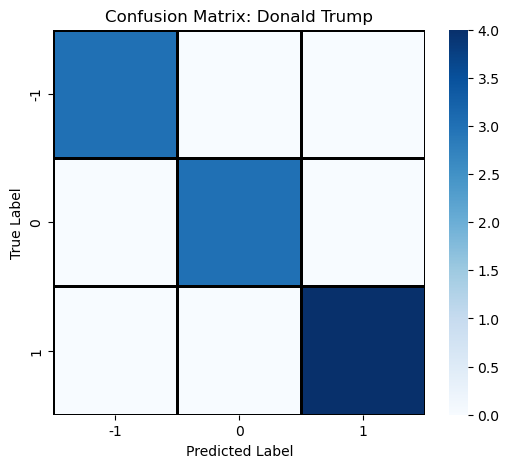

Donald Trump    | Test Accuracy: 1.0000 | Weight: 10


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

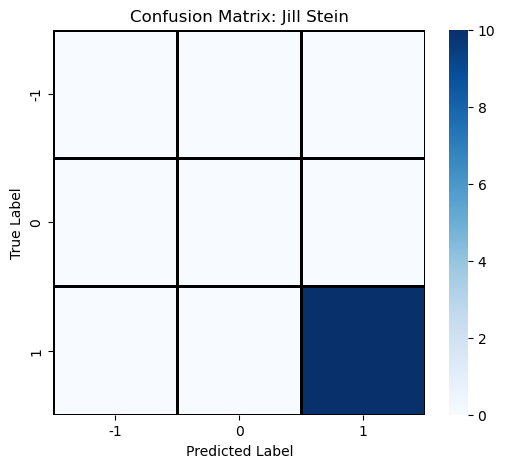

Jill Stein      | Test Accuracy: 1.0000 | Weight: 10


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

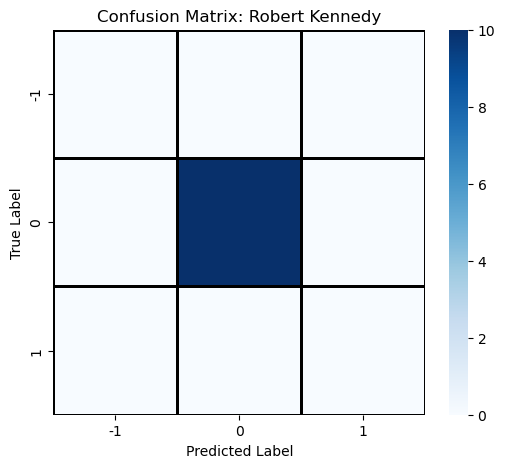

Robert Kennedy  | Test Accuracy: 1.0000 | Weight: 10


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

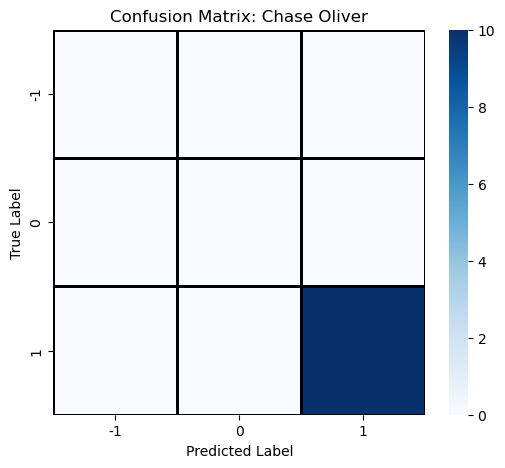

Chase Oliver    | Test Accuracy: 1.0000 | Weight: 10

📈 Final Weighted Test Metrics:
Weighted Accuracy : 1.0000
Weighted Precision: 1.0000
Weighted Recall   : 1.0000
Weighted F1-score : 1.0000


In [43]:
results = knn_weighted_accuracy(df_train_unscaled2, df_test_unscaled2, df_val_unscaled2)

In [44]:
columns = [
    'Method', 'Weighted_Accuracy', 
    'Weighted_Precision', 'Weighted_Recall', 'Weighted_F1'
]

df_method_performance = pd.DataFrame(columns=columns)

# Metrics for NLP + Unscaled
data_unscaled_nlp = pd.DataFrame([{
    'Method': 'NLP + Unscaled',
    'Weighted_Accuracy': 1.0000,
    'Weighted_Precision': 1.000,
    'Weighted_Recall': 1.0000,
    'Weighted_F1': 1.0000
}])

# Metrics for NLP + Scaled
data_scaled_nlp = pd.DataFrame([{
    'Method': 'NLP + Scaled',
    'Weighted_Accuracy': 1.0000,
    'Weighted_Precision': 1.0000,
    'Weighted_Recall': 1.0000,
    'Weighted_F1': 1.0000
}])

# Metrics for Scaled - NLP
data_scaled_minus_nlp = pd.DataFrame([{
    'Method': 'Scaled - NLP',
    'Weighted_Accuracy': 0.9800,
    'Weighted_Precision': 0.9814,
    'Weighted_Recall': 0.9800,
    'Weighted_F1': 0.9802
}])

# Metrics for Unscaled - NLP
data_unscaled_minus_nlp = pd.DataFrame([{
    'Method': 'Unscaled - NLP',
    'Weighted_Accuracy': 0.9800,
    'Weighted_Precision': 0.9805,
    'Weighted_Recall': 0.9800,
    'Weighted_F1': 0.9800
}])

# Concatenate the data for all methods into the DataFrame
df_method_performance = pd.concat([df_method_performance, data_unscaled_nlp, data_scaled_nlp, data_scaled_minus_nlp, data_unscaled_minus_nlp], ignore_index=True)

# Now you can manually add more data processing methods and their final metrics as needed
print(df_method_performance)

# Save to CSV
df_method_performance.to_csv("Team11_KNNClassifierPerformanceMetrics.csv", index=False)

           Method  Weighted_Accuracy  Weighted_Precision  Weighted_Recall  \
0  NLP + Unscaled               1.00              1.0000             1.00   
1    NLP + Scaled               1.00              1.0000             1.00   
2    Scaled - NLP               0.98              0.9814             0.98   
3  Unscaled - NLP               0.98              0.9805             0.98   

   Weighted_F1  
0       1.0000  
1       1.0000  
2       0.9802  
3       0.9800  
